In [40]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## Linear Regression 1 variable

In [41]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [ ]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0       #diferensial cost func terhadab weight
    dj_db = 0       #diferensial cost func terhadap bias

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]    #turunan cost funct terhadap parameter w nanti akan dihitung  sigmanya lalu dibagi m
        dj_db_i = f_wb - y[i]           #turunan cost funct terhadap parameter b
        dj_dw += dj_dw_i      #calculate sigma
        dj_db += dj_db_i
    dj_dw = dj_dw / m          
    dj_db = dj_db / m

    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, cost_func, gradient_func, num_iters):
    # w_in & b_in (w_init,b_init) adalah parameter yang kita tentukan di awal, up to we mau berapa aja bebas, karena ujung2nya bakal di adjust
    J_hist = [] #menyimpan nilai untuk membuat plot
    param_hist = []
    w = w_in    #w_init
    b = b_in    #b_init

    for i in range(num_iters):
        #calculate param w dan b untuk di adjust oleh gradient descent
        dj_dw, dj_db = gradient_func(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        param_hist.append([w,b])

        #calculate cost function dengan w dan b yang sudah diperbarui
        cost = cost_func(x,y,w,b)
        J_hist.append(cost)

        print(f"Iteration {i:4}: Cost {J_hist[-1]:0.2e}",
              f"dj_dw : {dj_dw:0.3e}, dj_db : {dj_db:0.3e}",
              f"w : {w: 0.3e}, b : {b: 0.3e}")

    return w,b,J_hist,param_hist

In [43]:
w_init = 0
b_init = 0
alpha = 1.0e-2
num_iters = 10000
w_final,b_final,J_hist,param_hist = gradient_descent(x_train,y_train
                                                    ,w_init,b_init,alpha,compute_cost,compute_gradient,num_iters)
print(f"(w,b) found by gradient descent algorithms : ({w_final : 8.4f},{b_final : 8.4f})")

Iteration    0: Cost 7.93e+04 dj_dw : -6.500e+02, dj_db : -4.000e+02 w :  6.500e+00, b :  4.000e+00
Iteration    1: Cost 7.39e+04 dj_dw : -6.278e+02, dj_db : -3.862e+02 w :  1.278e+01, b :  7.863e+00
Iteration    2: Cost 6.90e+04 dj_dw : -6.063e+02, dj_db : -3.730e+02 w :  1.884e+01, b :  1.159e+01
Iteration    3: Cost 6.43e+04 dj_dw : -5.855e+02, dj_db : -3.601e+02 w :  2.470e+01, b :  1.519e+01
Iteration    4: Cost 6.00e+04 dj_dw : -5.655e+02, dj_db : -3.478e+02 w :  3.035e+01, b :  1.867e+01
Iteration    5: Cost 5.59e+04 dj_dw : -5.461e+02, dj_db : -3.358e+02 w :  3.581e+01, b :  2.203e+01
Iteration    6: Cost 5.22e+04 dj_dw : -5.274e+02, dj_db : -3.243e+02 w :  4.109e+01, b :  2.527e+01
Iteration    7: Cost 4.87e+04 dj_dw : -5.094e+02, dj_db : -3.131e+02 w :  4.618e+01, b :  2.840e+01
Iteration    8: Cost 4.54e+04 dj_dw : -4.919e+02, dj_db : -3.023e+02 w :  5.110e+01, b :  3.143e+01
Iteration    9: Cost 4.23e+04 dj_dw : -4.751e+02, dj_db : -2.919e+02 w :  5.585e+01, b :  3.435e+01


note:
1.23e-04 = 1.23 × 10⁻⁴ = 1.23 × 0.0001 = 0.000123


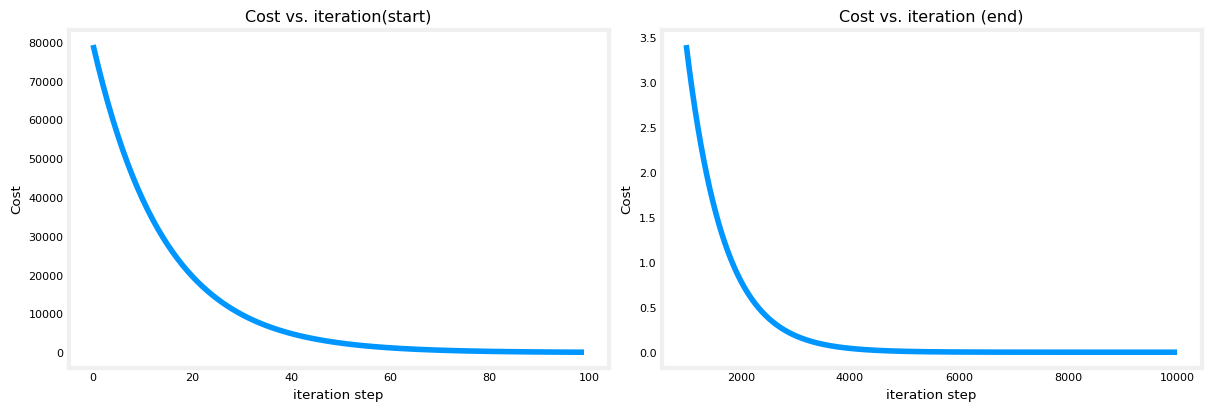

In [44]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

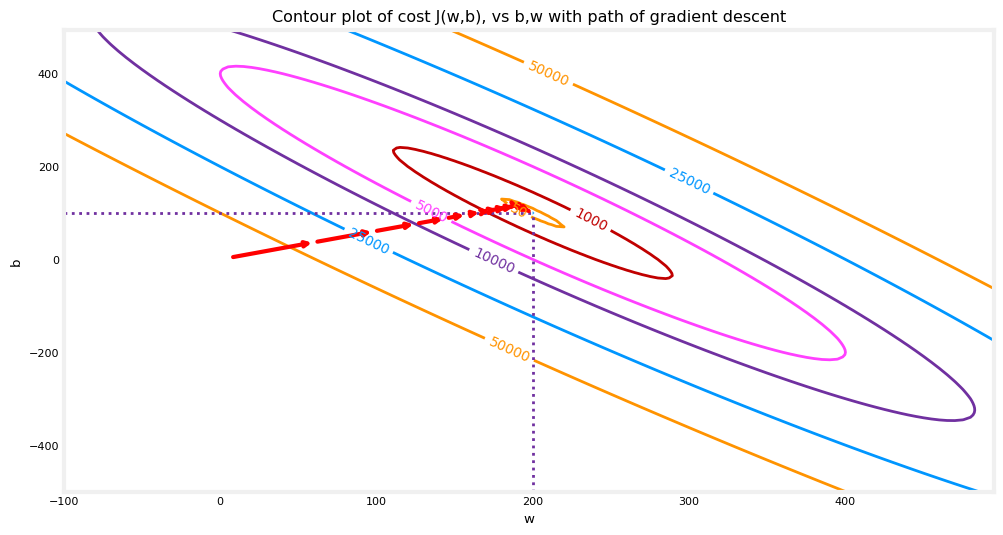

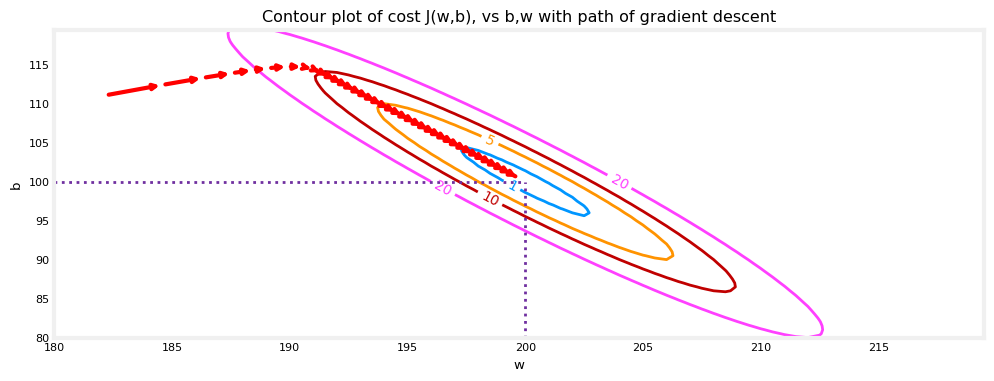

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, param_hist, ax)

fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, param_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

Iteration    0: Cost 2.58e+05 dj_dw : -6.500e+02, dj_db : -4.000e+02 w :  5.200e+02, b :  3.200e+02
Iteration    1: Cost 7.82e+05 dj_dw : 1.130e+03, dj_db : 7.000e+02 w : -3.840e+02, b : -2.400e+02
Iteration    2: Cost 2.37e+06 dj_dw : -1.970e+03, dj_db : -1.216e+03 w :  1.192e+03, b :  7.328e+02
Iteration    3: Cost 7.19e+06 dj_dw : 3.429e+03, dj_db : 2.121e+03 w : -1.551e+03, b : -9.638e+02
Iteration    4: Cost 2.18e+07 dj_dw : -5.974e+03, dj_db : -3.691e+03 w :  3.228e+03, b :  1.989e+03
Iteration    5: Cost 6.62e+07 dj_dw : 1.040e+04, dj_db : 6.431e+03 w : -5.095e+03, b : -3.156e+03
Iteration    6: Cost 2.01e+08 dj_dw : -1.812e+04, dj_db : -1.120e+04 w :  9.402e+03, b :  5.802e+03
Iteration    7: Cost 6.09e+08 dj_dw : 3.156e+04, dj_db : 1.950e+04 w : -1.584e+04, b : -9.801e+03
Iteration    8: Cost 1.85e+09 dj_dw : -5.496e+04, dj_db : -3.397e+04 w :  2.813e+04, b :  1.737e+04
Iteration    9: Cost 5.60e+09 dj_dw : 9.572e+04, dj_db : 5.916e+04 w : -4.845e+04, b : -2.996e+04


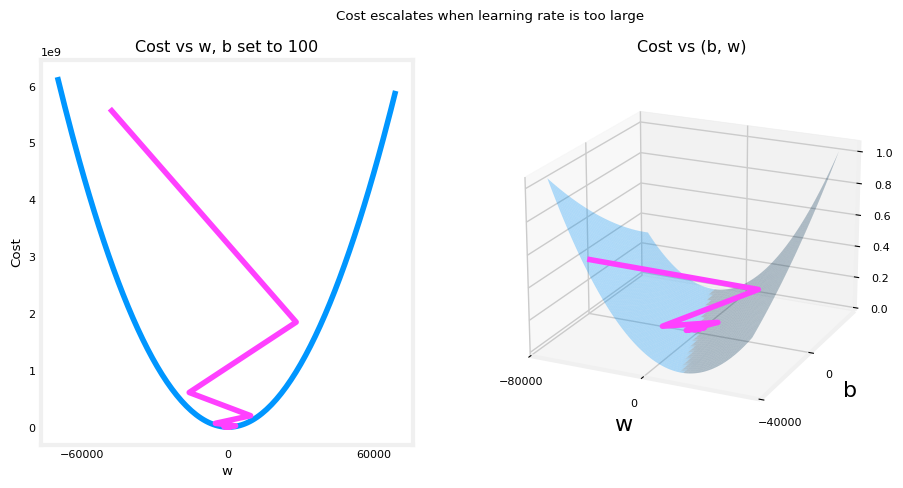

In [51]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, param_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha
                                                    , compute_cost, compute_gradient, iterations)

plt_divergence(param_hist, J_hist,x_train, y_train)
plt.show()

# Gradient Descent dangan stop otomatis 

In [110]:

def gradient_2(x,y,w_init,b_init,alpha,cost_func,gradient_func):
    histj = []
    histw = []
    histb = []
    w = w_init
    b = b_init

    # Threshold untuk konvergensi
    gradient_threshold = 1e-6
    cost_threshold = 1e-8

    convergen = False
    counter = 0

    while not convergen:

        dj_dw, dj_db = gradient_func(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        histw.append(w)
        histb.append(b)

        j = cost_func(x,y,w,b)
        histj.append(j)

        counter+=1

        # membuat agar berhenti otomatis ketika covergen
        '''
        kalau kita mau mengetahui itu sudah convergen atau tidak kita bisa mengacu pada perubahan nilai pada beberapa variable:
        1.  gradientnya dalam hal ini
            dj_dw dan dj_db, tapi ada satu masalah kalau gradient 0 itu bukan menunjukkan global minimum tapi menunjukkkan
            kalau grafik datar, tidak ada kemiringan. Bisa jadi gradient sudah 0 tapi masih ada minimum lain (in other word baru
            mencapai local minimum)
        2.  Cost, 
            Masalah yang muncul kalau learning rate terlalu kecil maka perubahan cost juga ikut kecil. Kalau kita pakai
            cost saja sebagai acuan maka akan berhenti ketika perubahan kecil itu padahal kalau dilanjutkan masil bisa turun cost nya
        3.  Param w & b,   
            masalahnya sama dengan cost kalau learning rate "Alpha" terlalu kecil perubahan juga menjadi kecil. Tapi
            ini sudah secara implisit masuk ke gradient karena jika gradient mendekati nol otomati perubahan w dan b juga mendekati 0.
            w = w - alpha x gradient_w
            Maka kita tidak tulis perubahan param w & b pada codingan. Melainkan hanya kondisi gradient
        Solusinya kita akan menggabungkan ke 3 nya.
        '''
        if counter > 1: #dicek ketika iterasi ke 2 agar bisa dikurang antara 2 nilai, kalau dari awal maka nilainya hanya 1 tidak bisa dikurang


            grad_converged =  (abs(dj_dw) < gradient_threshold and abs(dj_db) < gradient_threshold)
            cost_diff = histj[-1] - histj[-2]
            if cost_diff > 1e-3:                
                '''
                Tujuan kita lihat cost nya untuk meminimalisir, Dalam keadaan normal secara logika jhist[-1] HARUS < jhist[-2]
                karena cost turun setiap loop. Dan fungsi compute_cost tidak munkin negatif.
                Maka nilai dari cost_diff diharapkan selalu negatif.
                Tetapi ada dimana cost bisa naik sedikit, Maka kita buat if ini jika cost diff nya positif. Itu bertanda costnya naik
                dari nilai cost sebelumnya, karena histj[-1] (cost terakhir) > histj[-2] (cost sebelum terakhir)
                '''
                print(f"⚠️ WARNING: Cost increased from {histj[-2]:.6f} to {histj[-1]:.6f}")
                print("   Consider reducing learning rate (alpha)")
            cost_change = abs(cost_diff)    #jadi nilai mutalknya (selalu positif agar bisa dibandingkan dengan threshold)
            cost_converged = cost_change < cost_threshold

            if grad_converged or cost_converged:
                convergen = True
                print(f"\n✓ Converged at iteration {counter}")
                if grad_converged:
                    print(f"  Reason: Gradient < {gradient_threshold}")
                if cost_converged:
                    print(f"  Reason: Cost change < {cost_threshold}")
        
           
        if counter % 100 == 0 or convergen:
            print(f"Iteration {counter:4}: Cost {histj[-1]:0.2e} "
                    f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e} "
                    f"w: {w:0.3e}, b: {b:0.3e}")
        
    return w,b,histj,histb,histw

w_init = 0
b_init = 0
alpha = 1.0e-2
num_iters = 10000
w_final,b_final,J_hist,w_hist,b_hist = gradient_2(x_train,y_train
                                                    ,w_init,b_init,alpha,compute_cost,compute_gradient)
print(f"(w,b) found by gradient descent algorithms : ({w_final : 8.4f},{b_final : 8.4f})")
        

Iteration  100: Cost 9.22e+01 dj_dw: -2.128e+01, dj_db: -1.155e+01 w: 1.844e+02, b: 1.123e+02
Iteration  200: Cost 1.11e+01 dj_dw: -1.295e+00, dj_db: 6.889e-01 w: 1.907e+02, b: 1.147e+02
Iteration  300: Cost 9.49e+00 dj_dw: -6.384e-01, dj_db: 9.899e-01 w: 1.915e+02, b: 1.137e+02
Iteration  400: Cost 8.20e+00 dj_dw: -5.762e-01, dj_db: 9.310e-01 w: 1.921e+02, b: 1.128e+02
Iteration  500: Cost 7.09e+00 dj_dw: -5.351e-01, dj_db: 8.658e-01 w: 1.927e+02, b: 1.119e+02
Iteration  600: Cost 6.13e+00 dj_dw: -4.974e-01, dj_db: 8.049e-01 w: 1.932e+02, b: 1.110e+02
Iteration  700: Cost 5.29e+00 dj_dw: -4.624e-01, dj_db: 7.482e-01 w: 1.937e+02, b: 1.102e+02
Iteration  800: Cost 4.58e+00 dj_dw: -4.299e-01, dj_db: 6.956e-01 w: 1.941e+02, b: 1.095e+02
Iteration  900: Cost 3.95e+00 dj_dw: -3.996e-01, dj_db: 6.466e-01 w: 1.945e+02, b: 1.089e+02
Iteration 1000: Cost 3.42e+00 dj_dw: -3.715e-01, dj_db: 6.011e-01 w: 1.949e+02, b: 1.082e+02
Iteration 1100: Cost 2.95e+00 dj_dw: -3.454e-01, dj_db: 5.588e-01 w: 